In [7]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from code_repository.load.load_simulations import LoadSimulations

In [8]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [9]:
name = "synaptic_drive_DA"
folder = "ratio"

In [10]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1.hdf5")



e.add_experiment(name="p1_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1_dopamine_modulation_with_receptors_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")

e.add_experiment(name="p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-01-30-14-28-57-p1_p2.hdf5")



e.add_experiment(name="p1_p2_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_external-input-dardel-2023-01-30-14-28-57-p1_p2_dopamine_modulation_with_receptors_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")




   
e.experiments     

{'p1': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1.hdf5'},
 'p1_DA': {'color': 'red',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1_dopamine_modulation_with_receptors_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5'},
 'p1_p2': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'o

In [23]:
%%time
neuron_type = "dSPN"
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict_dspn = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)


Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1_dopamine_modulation_with_receptors_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-01-30-14-28-57-p1_p2.hdf5
Loading 40000 neurons with 

In [35]:
len(specific_trace_ids['p1'])

1936

In [32]:
len(spiking_analysis_dict_dspn['p1']['spiking'])

1257

In [37]:
len(specific_trace_ids['p1_p2'])

1936

In [38]:
len(spiking_analysis_dict_dspn['p1_p2']['spiking'])

1206

In [40]:
import numpy as np
diff = np.setdiff1d(spiking_analysis_dict_dspn['p1']['spiking'],spiking_analysis_dict_dspn['p1_p2']['spiking'])

In [41]:
len(diff)

114

In [42]:
diff

array([ 3226,  3352,  3700,  4147,  4211,  4255,  4326,  4330,  5541,
        5841,  5947,  6169,  6793,  6850,  7462,  7464,  7572,  7746,
        8203,  8347,  8403,  8412,  8476,  9971, 10460, 10519, 10669,
       11205, 11555, 11924, 12091, 12178, 12880, 13554, 13691, 13699,
       13892, 13893, 14017, 14018, 14065, 14133, 14321, 14328, 14921,
       14922, 14923, 14928, 15202, 15441, 15594, 18791, 18962, 19021,
       19026, 19189, 19190, 19216, 19342, 19510, 20487, 20510, 20556,
       20637, 20689, 20947, 21278, 21916, 22002, 22076, 22088, 22237,
       22239, 23766, 23816, 24298, 24650, 24660, 24662, 24890, 25676,
       25682, 27090, 27095, 27183, 27406, 27531, 27667, 28363, 28421,
       28427, 28995, 29447, 30555, 30556, 30739, 30751, 30805, 31204,
       31853, 31858, 33326, 33703, 33886, 34004, 34024, 34190, 34207,
       34244, 35276, 35281, 35411, 35575, 36017])

In [24]:
p_dspn = calculate_ratio(dictionary=spiking_analysis_dict_dspn)
n_dspn = normalized_prp(dictionary=p_dspn, normalized="p1")

In [29]:
p_dspn

{'p1': {'spiking': 1.0, 'other': 1.0},
 'p1_DA': {'spiking': 1.5123309466984884, 'other': 0.05294117647058823},
 'p1_p2': {'spiking': 0.9594272076372315, 'other': 1.075},
 'p1_p2_DA': {'spiking': 1.4765314240254575, 'other': 0.11911764705882352}}

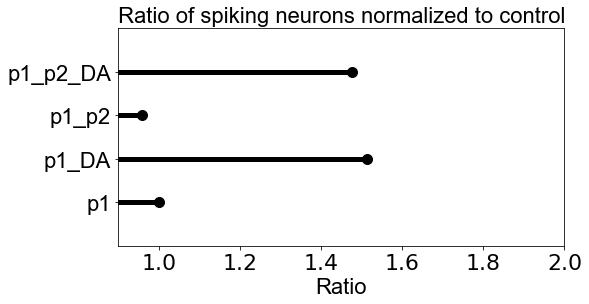

In [25]:
plot_ratio_normalized_spiking(ratio_dict=n_dspn, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, min_ratio=0.9, max_ratio=2)

In [26]:
%%time
neuron_type = "iSPN"
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict_ispn = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-01-30-14-28-38-p1_dopamine_modulation_with_receptors_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_external-input-dardel-2023-01-30-14-28-57-p1_p2.hdf5
Loading 40000 neurons with 

In [27]:
p_ispn = calculate_ratio(dictionary=spiking_analysis_dict_ispn)
n_ispn = normalized_prp(dictionary=p_ispn, normalized="p1")

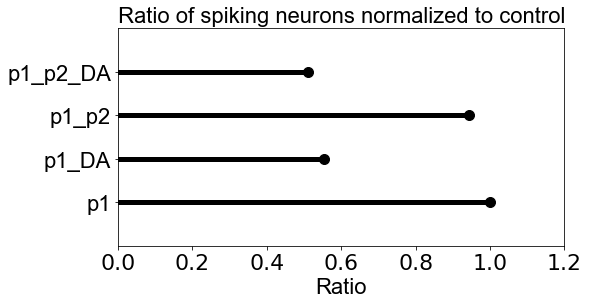

In [28]:
plot_ratio_normalized_spiking(ratio_dict=n, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, max_ratio=1.2)